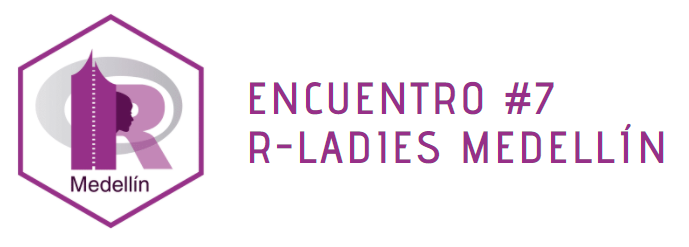

# Análisis y procesamiento de texto en R



En este taller procesaremos y analizaremos datos provenientes de Twitter relacionados con la vacunación contra el COVID-19 en Colombia.


## ¿Cómo extraer tweets de Twitter usando R?



El paquete `rtweet` proporciona a los usuarios de R una serie de funciones diseñadas para extraer datos de Twitter.

**Repositorio de GitHub:** https://github.com/ropensci/rtweet



### Obtener acceso al API de Twitter

El primer paso para extraer datos de Twitter es tener acceso a una API de Twitter:



1.   Si no tienes cuenta de Twitter, crea una.
2.   Aplica a una cuenta de desarrollador a través de esta página: https://developer.twitter.com/en/apply-for-access
3.   Llenar un formulario explicando qué deseas analizar y cual va a ser el tratamiento de los datos que vas a extraer.
4.   Guardar credenciales: 
      *   Consumer key
      *   Consumer Secret
      *   Access Token
      *   Access Secret








### Extraer tweets

In [ ]:
# instalar paquete
install.packages("rtweet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’, ‘httpuv’




In [ ]:
# Cargar paquete
library(rtweet)

# Credenciales de Twitter 
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
consumerKey <- 'XXXXXX'
consumerSecret <- 'XXXXXX'
accessToken <- 'XXXXXX'
accessTokenSecret <- 'XXXXXX'

# Nombre que le diste a la API 
appname <- "appname"

# Crear token para extraer datos
twitter_token <- create_token(app = appname,
                              consumer_key = consumerKey,
                              consumer_secret = consumerSecret,
                              access_token = accessToken,
                              access_secret = accessTokenSecret)
# Buscar tweets
datos_vacunacion <- search_tweets('vacunas OR vacunación OR vacuna AND "covid 19" AND colombia', n = 5000, include_rts = FALSE, lang = "es")

## Exploración de base de datos

In [1]:
# Instalar paquetes
install.packages(c("readr", "dplyr", "tidytext", "tm", "Hmisc", "wordcloud", "stringr", "tidyr", "udpipe"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargar paquetes
library(dplyr)
library(stringr)
library(tidytext)
library(tm)
library(wordcloud)
library(Hmisc)
library(tidyr)
library(udpipe)
library(ggplot2)

In [3]:
# Leer la base de datos
datos <- read.csv("/content/datos_vacunacion_taller.csv")
head(datos, 5)

,created_at,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>
1,22/09/2021 13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1
2,22/09/2021 13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2
3,15/09/2021 14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3
4,20/09/2021 23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4
5,14/09/2021 9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5


In [4]:
# Dimensiones de la base de datos
print(dim(datos))

# Nombre de las columnas
print(colnames(datos))

[1] 566  10
 [1] "created_at"         "text"               "source"            
 [4] "display_text_width" "favorite_count"     "retweet_count"     
 [7] "quote_count"        "reply_count"        "hashtags"          
[10] "id_tweet"          


In [5]:
# Explorar variables de la base de datos
glimpse(datos)

Rows: 566
Columns: 10
$ created_at         <chr> "22/09/2021 13:30", "22/09/2021 13:27", "15/09/2021…
$ text               <chr> "#LoViEnEnlace | El Invima aprobó modificar la auto…
$ source             <chr> "TweetDeck", "radiosantafe", "radiosantafe", "radio…
$ display_text_width <int> 257, 131, 121, 107, 107, 138, 116, 101, 136, 106, 1…
$ favorite_count     <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, …
$ retweet_count      <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, …
$ quote_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ reply_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ hashtags           <chr> "LoViEnEnlace", NA, NA, NA, NA, NA, NA, NA, NA, "Co…
$ id_tweet           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …


In [6]:
# Separar fecha y hora
datos <- separate(datos, created_at, c("date", "time"), sep = " ", remove = FALSE)
head(datos, 5)

,created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>
1,22/09/2021 13:30,22/09/2021,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1
2,22/09/2021 13:27,22/09/2021,13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2
3,15/09/2021 14:46,15/09/2021,14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3
4,20/09/2021 23:30,20/09/2021,23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4
5,14/09/2021 9:39,14/09/2021,9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5


In [7]:
# Columna fecha de tipo caracter a tipo date
datos$date <- as.Date(datos$date, format = "%d/%m/%Y")

In [8]:
glimpse(datos)

Rows: 566
Columns: 12
$ created_at         <chr> "22/09/2021 13:30", "22/09/2021 13:27", "15/09/2021…
$ date               <date> 2021-09-22, 2021-09-22, 2021-09-15, 2021-09-20, 20…
$ time               <chr> "13:30", "13:27", "14:46", "23:30", "9:39", "13:49"…
$ text               <chr> "#LoViEnEnlace | El Invima aprobó modificar la auto…
$ source             <chr> "TweetDeck", "radiosantafe", "radiosantafe", "radio…
$ display_text_width <int> 257, 131, 121, 107, 107, 138, 116, 101, 136, 106, 1…
$ favorite_count     <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, …
$ retweet_count      <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, …
$ quote_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ reply_count        <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ hashtags           <chr> "LoViEnEnlace", NA, NA, NA, NA, NA, NA, NA, NA, "Co…
$ id_tweet           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …


In [9]:
print(min(datos$date))
print(max(datos$date))

[1] "2021-09-13"
[1] "2021-09-22"


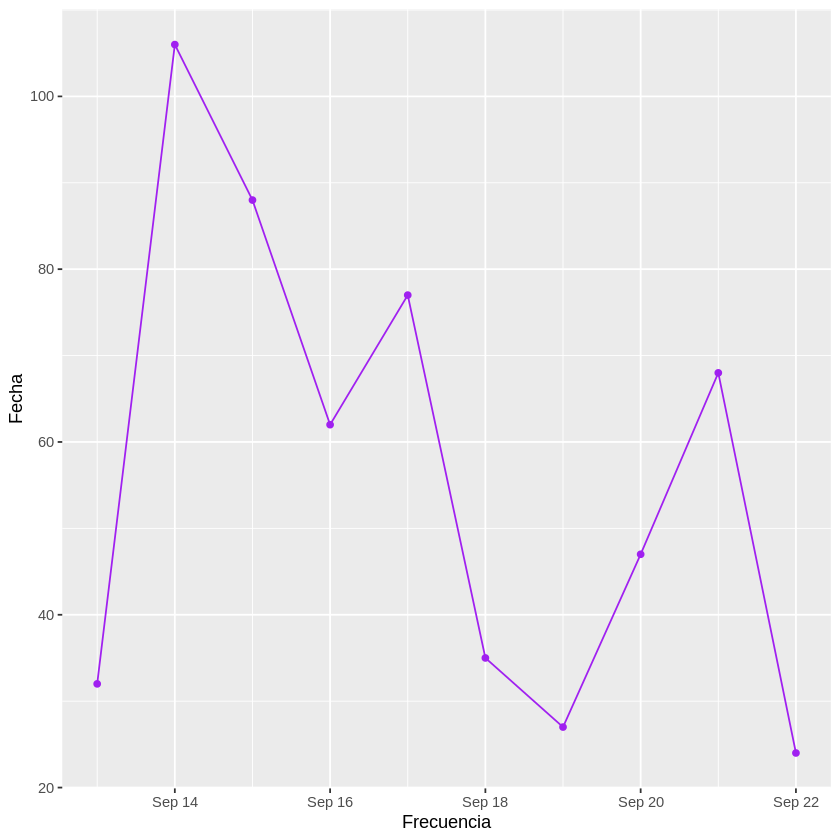

In [11]:
# Cantidad de tweets por día
datos %>% group_by(date) %>% 
          summarise(Frecuencia = n()) %>%
          ggplot(aes(x = date, y = Frecuencia)) +
          geom_line(color = "purple") +
          geom_point(color = "purple") +
          labs(x = "Frecuencia", y = "Fecha")

In [14]:
# Top source
unique(datos$source)
datos %>% count(source, sort = TRUE) %>%
          top_n(5)

[1] "TweetDeck"                      "radiosantafe"                  
 [3] "WordPress.com"                  "Twitter Web App"               
 [5] "Twitter for Android"            "Echobox"                       
 [7] "dlvr.it"                        "IFTTT"                         
 [9] "Twitter for iPhone"             "Hootsuite Inc."                
[11] "Blog2Social APP"                "Social Sharing Brightspot"     
[13] "Diario La Libertad"             "Spreaker"                      
[15] "Twitter Media Studio"           "ColombiacomTW"                 
[17] "Emplifi"                        "Buffer"                        
[19] "Twitter Ads"                    "Revive Social App"             
[21] "PanamericanaTV"                 "Twitter Media Studio - LiveCut"
[23] "ShareX"                         "LaFM"                          
[25] "RCN La Radio"                   "Agorapulse app"                
[27] "Metricool"                      "Actualidad Zuliana Oficial"    
[29] "araukas"                        "Alerta Bogotá"                 
[31] "Twitter for iPad"               "NextScripts OL"

Selecting by n



source,n
<chr>,<int>
Twitter Web App,187
Twitter for Android,109
TweetDeck,99
Twitter for iPhone,30
Hootsuite Inc.,28


In [24]:
# Top retweets
datos %>% arrange(-retweet_count) %>%
          head(5) %>%
          select(id_tweet, created_at, text, retweet_count)

,id_tweet,created_at,text,retweet_count
,<int>,<chr>,<chr>,<int>
1,482,15/09/2021 2:48,"Primeros resultados del análisis de efectividad de vacunas COVID-19 en personas &gt; 60 años en Colombia por @MinSalud Un estudio robusto. En resumen, alta efectividad para prevención de desenlaces graves (hospitalización y muerte) con cualquier vacuna Detalles y comentarios 🧵 https://t.co/Em2gUC3XbD",346
2,279,20/09/2021 12:23,"Este lunes, Colombia recibió 689.220 dosis de vacunas de Moderna, que se destinarán inicialmente para segundas dosis. Así, el país completa 44’798.504 dosis en territorio, con las que seguimos avanzando en la inmunización de la población contra la COVID-19. https://t.co/ycE8Q0tGIT",235
3,280,15/09/2021 20:19,"Este miércoles, Colombia recibió 339.300 dosis de vacunas de Pfizer, destinadas para segundas dosis, que llegan para reforzar el Plan Nacional de Vacunación contra la COVID-19, ahora que todas las etapas de inmunización están abiertas. #Vacunémonos✌️ https://t.co/b2aPkEVCwP",100
4,228,21/09/2021 0:19,"Con la aprobación de la vacuna de Moderna para menores de edad por parte del Invima, así quedan los lineamientos para administración de dosis contra el covid-19 en Colombia. https://t.co/O3oWyfEtnd",51
5,334,18/09/2021 14:16,🌎 SUDAMERICA Población(%) que habré recibido al menos una dosis de vacuna contra COVID-19: 🇺🇾 Uruguay 77% 🇨🇱 Chile 76% 🇧🇷 Brazil 67% 🇦🇷 Argentina 63% 🇪🇨 Ecuador 59% 🇨🇴 Colombia 48% 🇵🇪 Peru 37% 🇵🇾 Paraguay 35% 🇧🇴 Bolivia 35% 🇻🇪 Venezuela 23% https://t.co/T8LIiGi7vF,42


In [25]:
# Top favoritos
datos %>% arrange(-favorite_count) %>%
          head(5) %>%
          select(id_tweet, created_at, text, favorite_count)

,id_tweet,created_at,text,favorite_count
,<int>,<chr>,<chr>,<int>
1,279,20/09/2021 12:23,"Este lunes, Colombia recibió 689.220 dosis de vacunas de Moderna, que se destinarán inicialmente para segundas dosis. Así, el país completa 44’798.504 dosis en territorio, con las que seguimos avanzando en la inmunización de la población contra la COVID-19. https://t.co/ycE8Q0tGIT",1070
2,482,15/09/2021 2:48,"Primeros resultados del análisis de efectividad de vacunas COVID-19 en personas &gt; 60 años en Colombia por @MinSalud Un estudio robusto. En resumen, alta efectividad para prevención de desenlaces graves (hospitalización y muerte) con cualquier vacuna Detalles y comentarios 🧵 https://t.co/Em2gUC3XbD",835
3,280,15/09/2021 20:19,"Este miércoles, Colombia recibió 339.300 dosis de vacunas de Pfizer, destinadas para segundas dosis, que llegan para reforzar el Plan Nacional de Vacunación contra la COVID-19, ahora que todas las etapas de inmunización están abiertas. #Vacunémonos✌️ https://t.co/b2aPkEVCwP",483
4,304,19/09/2021 13:58,El 43% de personas en Colombia apoya que se pida carné de vacunación en las oficinas. Lea acá lo que mostró una encuesta al respecto → https://t.co/sdjpcKcyxu | #DomingoEnElTiempo https://t.co/Dw3DfW6NXo,426
5,228,21/09/2021 0:19,"Con la aprobación de la vacuna de Moderna para menores de edad por parte del Invima, así quedan los lineamientos para administración de dosis contra el covid-19 en Colombia. https://t.co/O3oWyfEtnd",134


In [26]:
devtools::install_github("hadley/emo")
library(emo)


✔  checking for file ‘/tmp/Rtmp8pa949/remotes12735a8acc3f/hadley-emo-3f03b11/DESCRIPTION’
─  preparing ‘emo’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘emo_0.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [29]:
datos %>% mutate(emoji = ji_extract_all(text)) %>%
          unnest(cols = c(emoji)) %>% 
          count(emoji, sort = TRUE) %>%
          top_n(10)

Selecting by n



emoji,n
<chr>,<int>
🇨🇴,65
⏬,61
➡️,45
💉,45
📌,27
👉,26
🔴,20
📻,18
⏫,17


Selecting by n



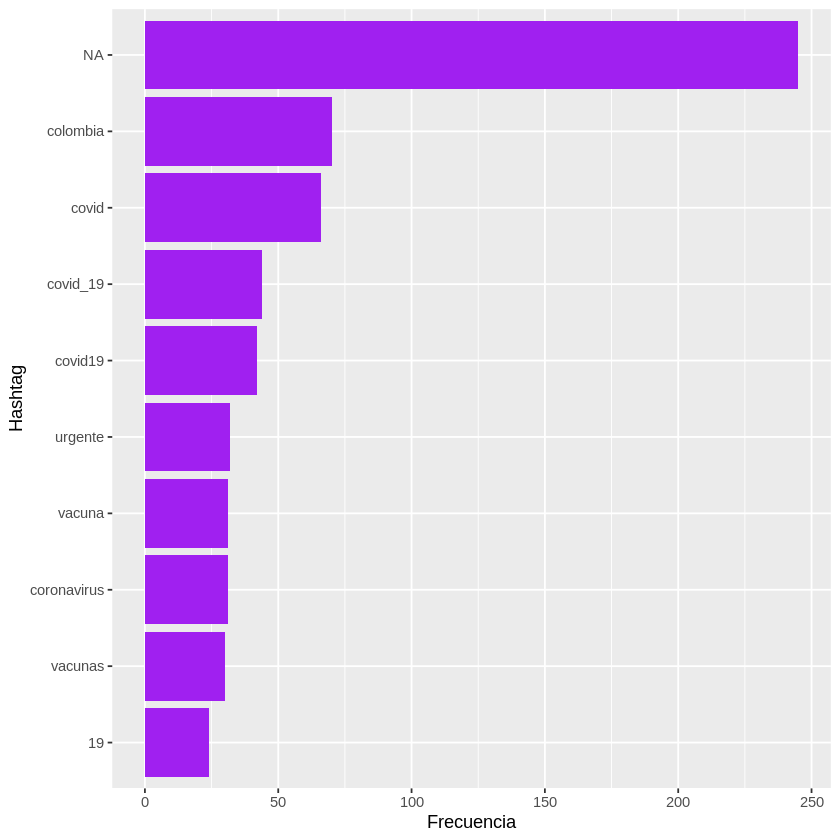

In [32]:
# Top hashtags
datos %>% unnest_tokens(hashtag, hashtags) %>%
          count(hashtag, sort = TRUE) %>%
          top_n(10) %>%
          ggplot(aes(x = n, y = reorder(hashtag, n))) +
          geom_bar(stat = "identity", fill = "purple") +
          labs(x = "Frecuencia", y = "Hashtag")

## Preprocesamiento del texto

In [44]:
# seleccionamos columnas id y texto
datos_texto <- datos %>% select(id_tweet, text)

# Todo en minúscula
datos_texto <- datos_texto %>% mutate(text = tolower(text))

datos_texto

id_tweet,text
<int>,<chr>
1,#lovienenlace | el invima aprobó modificar la autorización sanitaria de uso en emergencia asue para la vacuna contra covid-19 desarrollada por la farmecéutica moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/iwqoa66wk5
2,se eleva a 38.6 millones de vacunas aplicadas contra el covid-19 en colombia y a 16.2 millones los esquemas https://t.co/teoh8yesfj
3,más de 1.2 millones de vacunas contra covid-19 de moderna llegan entre jueves y sábado a colombia https://t.co/ta79sp4fj9
4,colombia recibió este lunes 689.220 dosis de vacunas contra el covid-19 de moderna https://t.co/woyutsl9og
5,invima autoriza ensayo clínico solidaridad para vacunas contra covid-19 en colombia https://t.co/w1dku90zap
6,colombia supera las 38 millones de vacunas aplicadas contra el covid-19 y está llegando a 16 millones de esquemas https://t.co/ibuv6hpb0b
7,colombia aplicará la vacuna de moderna contra covid-19 a adolescentes entre los 12 y 17 años https://t.co/vrygvrdr1b
8,colombia recibió casi un millón de vacunas contra covid-19 donadas por españa https://t.co/uwyk87eedf
9,sigue disminuyendo el ritmo de vacunación contra el covid-19 en colombia: solo 97 mil 114 dosis se aplicaron el https://t.co/sqffijwuf0


In [45]:
# Remover páginas web del texto
datos_texto$text <- str_replace_all(datos_texto$text, 'https\\S+', " ")
datos_texto$text <- str_replace_all(datos_texto$text, 'www\\S+', " ")

In [46]:
# Remover nombres de usuario
datos_texto$text <- str_replace_all(datos_texto$text, '@\\S+', " ")

In [47]:
# Remover hashtags
datos_texto$text <- str_replace_all(datos_texto$text, '#\\S+', " ")

In [48]:
# Remover caracteres especiales
datos_texto$text <- str_replace_all(datos_texto$text, '[^a-zA-Z0-9áéíóúñ ]', " ")

In [50]:
# Remover espacios en blanco
datos_texto$text <- str_squish(datos_texto$text)

In [51]:
# Ver filas duplicadas
datos_texto[duplicated(datos_texto$text), ]

,id_tweet,text
,<int>,<chr>
13,13,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
14,14,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
15,15,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
16,16,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
17,17,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
18,18,partir de octubre colombia aplicará terceras dosis de la vacuna a personas con condiciones específicas conozca los detalles aquí
20,20,sobre los resultados del primer estudio desarrollado en colombia sobre efectividad de vacunas en adultos mayores aquí
21,21,sobre los resultados del primer estudio desarrollado en colombia sobre efectividad de vacunas en adultos mayores aquí
22,22,de moderna que arriben a colombia serán destinadas segundas dosis pendientes conozca los detalles aquí


In [57]:
# detecter si hay palabras repetidas
datos_texto[str_detect(datos_texto$text, "\\b(\\w+)\\b \\b\\1\\b"), ]

id_tweet,text
<int>,<chr>


In [56]:
# Eliminar palabras repitadas
datos_texto$text <- str_replace_all(datos_texto$text, "\\b(\\w+)\\b \\b\\1\\b", "\\1")

In [77]:
# detectar si más de 3 letras iguales consecutivas
datos_texto[str_detect(datos_texto$text, "([a-z])\\1{2,}"),]

id_tweet,text
<int>,<chr>


In [ ]:
# Clasificar como NA al texto que quede solo con espacios o con un caracter o con solo numeros despues del procesamiento
datos_texto <- datos_texto %>% mutate(text = ifelse(trimws(text) == "", NA, text))
datos_texto <- datos_texto %>% mutate(text = ifelse(nchar(text) == 1,  NA, text))
datos_texto <- datos_texto %>% mutate(text = ifelse(trimws(str_replace_all(text, "[0-9]", "")) == "", NA, text))

datos_texto[is.na(datos_texto$text), ]

### Stopwords

In [ ]:
# Extraer sotpwords del español
stop_wrd <- as.data.frame(stopwords("spanish"))
colnames(stop_wrd) <- "word"
stop_wrd

In [ ]:
# Remover de la lista algunas stopwords
stopwords_negacion <- c("no", "ni", "sin")
stop_wrd <- stop_wrd %>% filter(!word %in% stopwords_negacion)
stop_wrd

In [ ]:
# Remover del texto las stopwords
datos_texto <- datos_texto %>% unnest_tokens(word, text) %>%
                               anti_join(stop_wrd, by = "word") %>%    
                               group_by(id_tweet) %>% 
                               summarise(text = paste0(word, collapse = " "))

datos_texto

### Lematización

In [63]:
# Cargar modelo español
ud_model <- udpipe_download_model(language = "spanish")
ud_model <- udpipe_load_model(ud_model$file_model)


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




In [64]:
# Lematización
x <- udpipe_annotate(ud_model, x = datos_texto$text, doc_id = datos_texto$id_tweet)
x <- as.data.frame(x)
x

doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,1,invima,invima,NOUN,NA,Gender=Fem|Number=Sing,2,nsubj,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,2,aprobó,aprobar,VERB,NA,Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin,0,root,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,3,modificar,modificar,VERB,NA,VerbForm=Inf,2,xcomp,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,4,autorización,autorización,NOUN,NA,Gender=Fem|Number=Sing,6,nsubj,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,5,sanitaria,sanitario,ADJ,NA,Gender=Fem|Number=Sing,4,amod,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,6,uso,uso,VERB,NA,VerbForm=Fin,3,ccomp,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,7,emergencia,emergencia,NOUN,NA,Gender=Fem|Number=Sing,8,nsubj,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,8,asue,asue,VERB,NA,Mood=Sub|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin,6,advcl,NA,NA
1,1,1,invima aprobó modificar autorización sanitaria uso emergencia asue vacuna covid 19 desarrollada farmecéutica moderna pueda ser administrada jóvenes 12 17 años,9,vacuna,vacuna,NOUN,NA,Gender=Fem|Number=Sing,8,obj,NA,NA


In [65]:
x[x$doc_id == 2,]

,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
22,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,1,eleva,elevar,VERB,NA,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin,0,root,NA,NA
23,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,2,38,38,NUM,NA,NumType=Card,3,nummod,NA,NA
24,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,3,6,6,NUM,NA,NumType=Card,4,nummod,NA,NA
25,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,4,millones,millón,NOUN,NA,Gender=Masc|Number=Plur,1,obj,NA,NA
26,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,5,vacunas,vacuno,PRON,NA,Gender=Fem|Number=Plur|PronType=Ind,4,case,NA,NA
27,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,6,aplicadas,aplicado,VERB,NA,Gender=Fem|Number=Plur|VerbForm=Part,5,acl,NA,NA
28,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,7,covid,covid,PROPN,NA,Gender=Fem|Number=Sing,6,appos,NA,NA
29,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,8,19,19,NUM,NA,NumType=Card,7,appos,NA,NA
30,2,1,1,eleva 38 6 millones vacunas aplicadas covid 19 colombia 16 2 millones esquemas,9,colombia,colombiar,VERB,NA,Gender=Fem|Number=Sing|VerbForm=Fin,1,advcl,NA,NA


In [66]:
lemma <- x %>% select(doc_id, lemma)
lemma <- na.omit(lemma)
lemma$doc_id <- as.integer(lemma$doc_id)
colnames(lemma) <- c("id_tweet", "word")
lemma

,id_tweet,word
,<int>,<chr>
1,1,invima
2,1,aprobar
3,1,modificar
4,1,autorización
5,1,sanitario
6,1,uso
7,1,emergencia
8,1,asue
9,1,vacuna


In [71]:
data_texto <- lemma %>% group_by(id_tweet) %>% 
                        summarise(text = paste0(word, collapse = " "))

data_texto

id_tweet,text
<int>,<chr>
1,invima aprobar modificar autorización sanitario uso emergencia asue vacuna covid 19 desarrollado farmecéutica moderno poder ser administrado joven 12 17 año
2,elevar 38 6 millón vacuno aplicado covid 19 colombiar 16 2 millón esquema
3,1 2 millón vacuno covid 19 moderno llegar jueves sábado colombiar
4,colombia recibir lunes 689 220 dosis vacuno covid 19 moderno
5,invima autorizo ensayo clínico solidaridad vacuno covid 19 colombiar
6,colombia superar 38 millón vacuno aplicado covid 19 llegar 16 millón esquema
7,colombia aplicar vacuna moderno covid 19 adolescente 12 17 año
8,colombia recibir casi millón vacuno covid 19 donado españa
9,seguir disminuir ritmo vacunación covid 19 colombiar solo 97 mil 114 dosis aplicar


In [73]:
# Corregir algunos errores de lematización y transformar algunas palabras
data_texto$text <- str_replace_all(data_texto$text, 'colombiar', "colombia")
data_texto$text <- str_replace_all(data_texto$text, 'covid 19', "covid19")

In [74]:
# cambiar nombre de la columna texto
colnames(data_texto) <- c("id_tweet", "texto_nuevo")

# unir base de datos original con base de datos nueva
data_final <- datos %>% left_join(data_texto, by = "id_tweet")
data_final

created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet,texto_nuevo
<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>,<chr>
22/09/2021 13:30,2021-09-22,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1,invima aprobar modificar autorización sanitario uso emergencia asue vacuna covid19 desarrollado farmecéutica moderno poder ser administrado joven 12 17 año
22/09/2021 13:27,2021-09-22,13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2,elevar 38 6 millón vacuno aplicado covid19 colombia 16 2 millón esquema
15/09/2021 14:46,2021-09-15,14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3,1 2 millón vacuno covid19 moderno llegar jueves sábado colombia
20/09/2021 23:30,2021-09-20,23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4,colombia recibir lunes 689 220 dosis vacuno covid19 moderno
14/09/2021 9:39,2021-09-14,9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5,invima autorizo ensayo clínico solidaridad vacuno covid19 colombia
17/09/2021 13:49,2021-09-17,13:49,Colombia supera las 38 millones de vacunas aplicadas contra el Covid-19 y está llegando a 16 millones de esquemas https://t.co/IbuV6HPb0b,radiosantafe,138,0,0,NA,NA,NA,6,colombia superar 38 millón vacuno aplicado covid19 llegar 16 millón esquema
21/09/2021 10:23,2021-09-21,10:23,Colombia aplicará la vacuna de Moderna contra Covid-19 a adolescentes entre los 12 y 17 años https://t.co/VRygvrdR1b,radiosantafe,116,0,0,NA,NA,NA,7,colombia aplicar vacuna moderno covid19 adolescente 12 17 año
14/09/2021 2:36,2021-09-14,2:36,Colombia recibió casi un millón de vacunas contra Covid-19 donadas por España https://t.co/uwYk87eedF,radiosantafe,101,1,1,NA,NA,NA,8,colombia recibir casi millón vacuno covid19 donado españa
21/09/2021 15:06,2021-09-21,15:06,Sigue disminuyendo el ritmo de vacunación contra el Covid-19 en Colombia: Solo 97 mil 114 dosis se aplicaron el https://t.co/sqffiJwUF0,radiosantafe,136,0,1,NA,NA,NA,9,seguir disminuir ritmo vacunación covid19 colombia solo 97 mil 114 dosis aplicar


## Análisis descriptivo

### Longitud final tweets

In [75]:
# Extraer la longitud de cada tweet
tweet_long <- data_final %>% unnest_tokens(word, texto_nuevo) %>% 
                             group_by(id_tweet) %>% 
                             summarise(longitud = n())

tweet_long

id_tweet,longitud
<int>,<int>
1,20
2,12
3,10
4,9
5,8
6,11
7,9
8,8
9,12


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



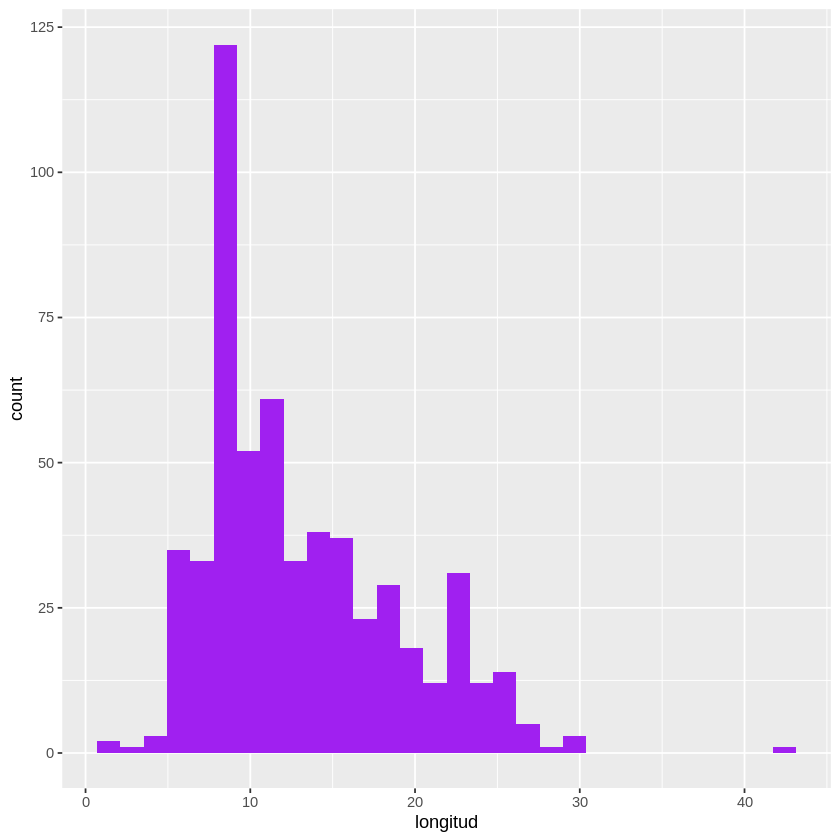

In [76]:
ggplot(tweet_long, aes(x=longitud)) + geom_histogram(fill="purple")

### Palabras más populares

In [89]:
# dividir el texto en palabras
data_text_analisis <- data_final %>% filter(!is.na(texto_nuevo))
data_text_analisis$texto_nuevo <- str_replace_all(data_text_analisis$texto_nuevo, "vacuno", "vacuna")
data_text_analisis$texto_nuevo <- str_replace_all(data_text_analisis$texto_nuevo, "moderno", "moderna")
unigramas <- data_text_analisis %>% select(id_tweet, texto_nuevo) %>%
                                    unnest_tokens(word, texto_nuevo, token = "ngrams", n = 1)
                    
unigramas

id_tweet,word
<int>,<chr>
1,invima
1,aprobar
1,modificar
1,autorización
1,sanitario
1,uso
1,emergencia
1,asue
1,vacuna


In [86]:
# conteo de palabras
# https://www.r-graph-gallery.com/index.html
count_unigrama <- unigramas %>% count(word, sort = TRUE)
colnames(count_unigrama) <- c("unigrama", "n")

head(count_unigrama, 10)

,unigrama,n
,<chr>,<int>
1,covid19,413
2,vacuna,392
3,colombia,387
4,dosis,198
5,vacunación,139
6,año,82
7,recibir,78
8,mayor,75
9,país,65


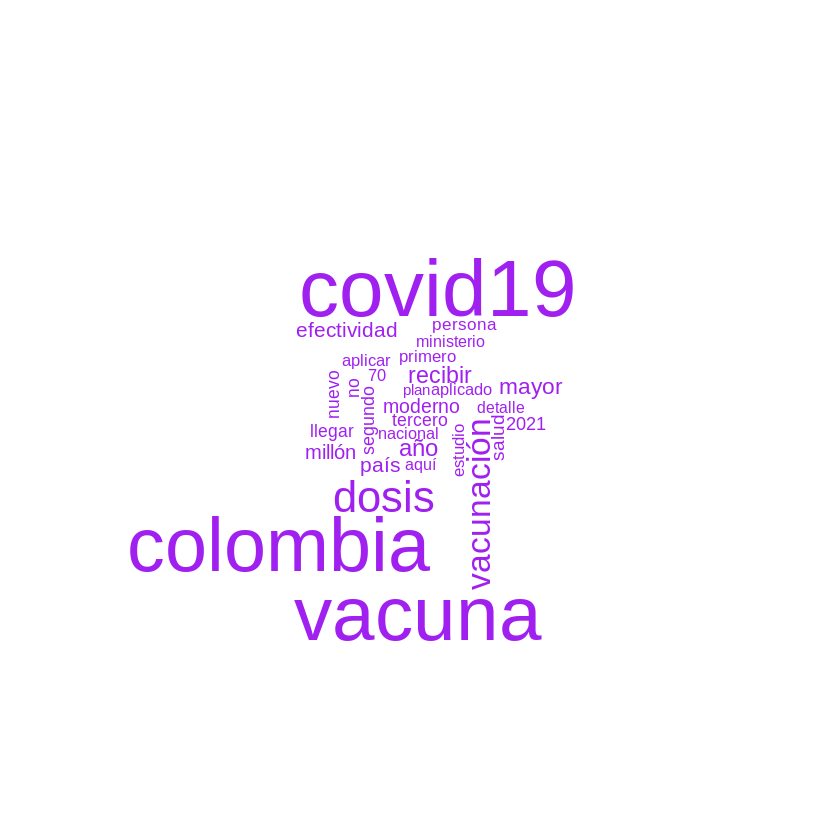

In [87]:
# Construir nube de palabras
wordcloud(words = count_unigrama$unigrama, freq = count_unigrama$n,  scale=c(4,0.5),  min.freq = 1, max.words=30, colors="Purple")

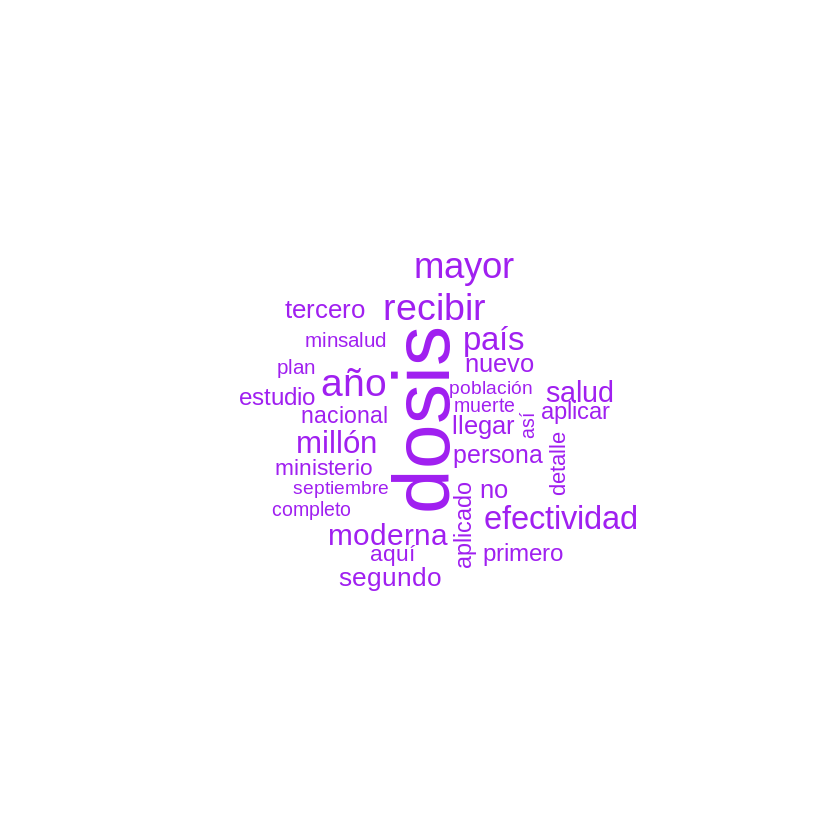

In [90]:
lista <- c("covid", "vacuna", "covid19", "colombia", "vacunación")
# remove numbers 
data_text_analisis$texto_nuevo <- str_replace_all(data_text_analisis$texto_nuevo, "[0-9]", " ")
unigramas <- data_text_analisis %>% select(id_tweet, texto_nuevo) %>%
                                    unnest_tokens(word, texto_nuevo, token = "ngrams", n = 1)

count_unigrama <- unigramas %>% count(word, sort = TRUE)
colnames(count_unigrama) <- c("unigrama", "n")                              
count_unigrama <- count_unigrama %>% filter(!unigrama %in% lista)

wordcloud(words = count_unigrama$unigrama, freq = count_unigrama$n,  scale=c(4,0.5),  min.freq = 1, max.words=30, colors="Purple")

In [91]:
data_text_analisis %>% filter(str_detect(texto_nuevo, "moderna"))

created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet,texto_nuevo
<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>,<chr>
22/09/2021 13:30,2021-09-22,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1,invima aprobar modificar autorización sanitario uso emergencia asue vacuna covid desarrollado farmecéutica moderna poder ser administrado joven año
15/09/2021 14:46,2021-09-15,14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3,millón vacuna covid moderna llegar jueves sábado colombia
20/09/2021 23:30,2021-09-20,23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4,colombia recibir lunes dosis vacuna covid moderna
21/09/2021 10:23,2021-09-21,10:23,Colombia aplicará la vacuna de Moderna contra Covid-19 a adolescentes entre los 12 y 17 años https://t.co/VRygvrdR1b,radiosantafe,116,0,0,NA,NA,NA,7,colombia aplicar vacuna moderna covid adolescente año
16/09/2021 3:45,2021-09-16,3:45,#ATENCIÓN📌Vacunas #COVID19 de Moderna que arriben a Colombia serán destinadas segundas dosis pendientes. Conozca los detalles aquí➡️https://t.co/oWTOk0qzFk https://t.co/KfRpqcDhR7,TweetDeck,155,0,0,NA,NA,ATENCIÓN COVID19,11,moderna arribir colombia destinado segundo dosis pendiente conocer detalle aquí
16/09/2021 11:45,2021-09-16,11:45,#ATENCIÓN📌Vacunas #COVID19 de Moderna que arriben a Colombia serán destinadas segundas dosis pendientes. Conozca los detalles aquí➡️https://t.co/oWTOk0qzFk https://t.co/RH4OevVHl9,TweetDeck,155,0,0,NA,NA,ATENCIÓN COVID19,22,moderna arribir colombia destinado segundo dosis pendiente conocer detalle aquí
16/09/2021 1:45,2021-09-16,1:45,#ATENCIÓN📌Vacunas #COVID19 de Moderna que arriben a Colombia serán destinadas segundas dosis pendientes. Conozca los detalles aquí➡️https://t.co/oWTOk0IawS https://t.co/cqfalF7c1q,TweetDeck,155,0,0,NA,NA,ATENCIÓN COVID19,23,moderna arribir colombia destinado segundo dosis pendiente conocer detalle aquí
16/09/2021 13:46,2021-09-16,13:46,#ATENCIÓN📌Vacunas #COVID19 de Moderna que arriben a Colombia serán destinadas segundas dosis pendientes. Conozca los detalles aquí➡️https://t.co/oWTOk0IawS https://t.co/Zn9csaQbFb,TweetDeck,155,0,0,NA,NA,ATENCIÓN COVID19,24,moderna arribir colombia destinado segundo dosis pendiente conocer detalle aquí
16/09/2021 9:45,2021-09-16,9:45,#ATENCIÓN📌Vacunas #COVID19 de Moderna que arriben a Colombia serán destinadas segundas dosis pendientes. Conozca los detalles aquí➡️https://t.co/oWTOk0qzFk https://t.co/XYMps2aTXu,TweetDeck,155,0,0,NA,NA,ATENCIÓN COVID19,26,moderna arribir colombia destinado segundo dosis pendiente conocer detalle aquí


### Bigramas más populares

In [92]:
# Dividir el texto en bigramas
bigramas <- data_text_analisis %>% select(id_tweet, texto_nuevo) %>%
                               unnest_tokens(bigrama, texto_nuevo, token = "ngrams", n = 2)
                    
bigramas

id_tweet,bigrama
<int>,<chr>
1,invima aprobar
1,aprobar modificar
1,modificar autorización
1,autorización sanitario
1,sanitario uso
1,uso emergencia
1,emergencia asue
1,asue vacuna
1,vacuna covid


In [93]:
# Bigramas más populares
count_bigrama <- bigramas %>% count(bigrama, sort = TRUE)
colnames(count_bigrama) <- c("bigrama", "n")
count_bigrama

bigrama,n
<chr>,<int>
vacuna covid,223
dosis vacuna,106
vacunación covid,63
mayor año,50
efectividad vacuna,46
segundo dosis,45
tercero dosis,43
covid colombia,38
millón vacuna,37


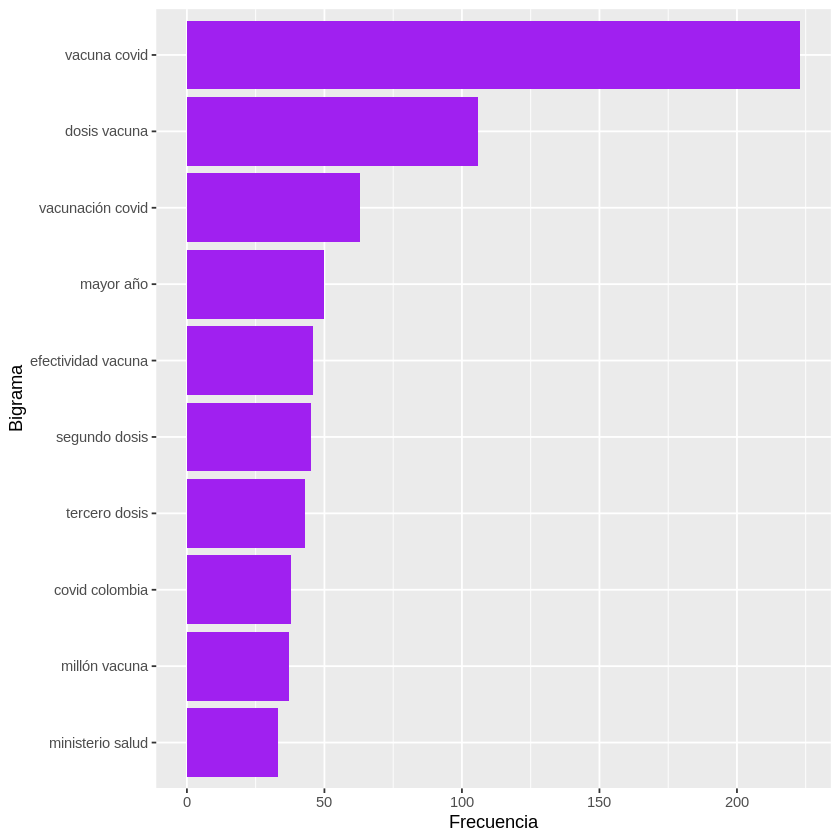

In [94]:
# Construir gráfico de barras
populares_bigramas <- head(count_bigrama, 10)
ggplot(populares_bigramas, aes(x = n, y = reorder(bigrama, n))) + 
       geom_bar(stat = "identity", fill = "purple") +
       labs(x = "Frecuencia", y = "Bigrama")

In [95]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



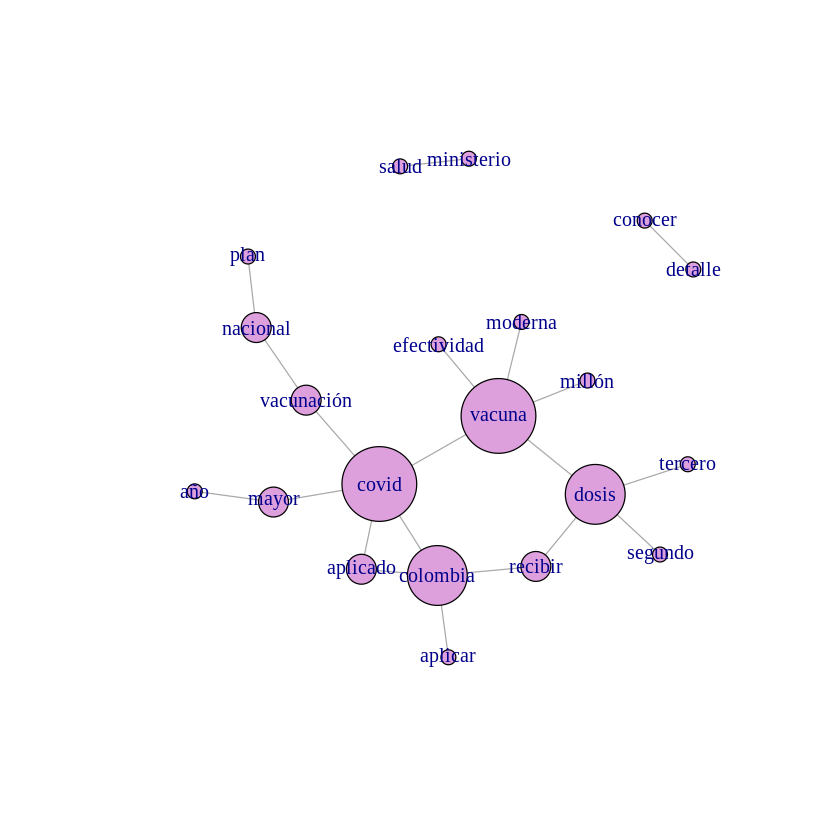

In [97]:
# https://www.r-graph-gallery.com/
library(igraph)

# Construir red
populares_bigramas <- head(count_bigrama, 20)
bigrams_separated <- populares_bigramas %>% separate(bigrama, c("word1_p", "word2_p"), sep = " ")

links <- bigrams_separated %>% select(-n)


# Convertir en un objeto igraph
network <- graph_from_data_frame(d=links, directed=F) 
 
# Tamaño de cada nodo
deg <- degree(network, mode="all")

# Graficar
plot(network, vertex.size=deg*6, vertex.color="plum", color = "purple")

### Análisis de sentimiento

In [98]:
puntuaciones <- read.csv("lexico_afinn.en.es.csv", stringsAsFactors = F, fileEncoding = "latin1") 
colnames(puntuaciones) <- c("word", "puntuacion", "word_en")
puntuaciones$word <- str_to_lower(puntuaciones$word)

puntuaciones

word,puntuacion,word_en
<chr>,<int>,<chr>
a bordo,1,aboard;
abandona,-2,abandons;
abandonado,-2,abandoned;
abandonar,-2,abandon;
abatido,-2,dejected;
abatido,-3,despondent;
aborrece,-3,abhors;
aborrecer,-3,abhor;
aborrecible,-3,abhorrent;


In [99]:
text_puntuaciones <- data_text_analisis %>% 
                     select(id_tweet, texto_nuevo) %>%
                     unnest_tokens(word, texto_nuevo) 
text_puntuaciones

id_tweet,word
<int>,<chr>
1,invima
1,aprobar
1,modificar
1,autorización
1,sanitario
1,uso
1,emergencia
1,asue
1,vacuna


In [100]:
text_puntuaciones <- text_puntuaciones %>%
                     mutate(ID = 1:nrow(text_puntuaciones)) %>%
                     inner_join(puntuaciones, by = "word")

text_puntuaciones

id_tweet,word,ID,puntuacion,word_en
<int>,<chr>,<int>,<int>,<chr>
1,emergencia,7,-2,emergency;
3,llegar,31,1,reaching;
5,solidaridad,46,2,solidarity;
6,llegar,56,1,reaching;
9,solo,80,-2,alone;
19,mayor,199,3,greater;
19,mayor,199,3,greatest;
20,mayor,209,3,greater;
20,mayor,209,3,greatest;


In [101]:
text_puntuaciones <- text_puntuaciones[!duplicated(text_puntuaciones$word), ]
text_puntuaciones

,id_tweet,word,ID,puntuacion,word_en
,<int>,<chr>,<int>,<int>,<chr>
1,1,emergencia,7,-2,emergency;
2,3,llegar,31,1,reaching;
3,5,solidaridad,46,2,solidarity;
5,9,solo,80,-2,alone;
6,19,mayor,199,3,greater;
24,39,autoridad,398,1,authority;
25,39,realizar,400,2,accomplish;
26,40,no,418,-1,no;
29,45,bienvenido,467,2,welcome;


In [102]:
text_puntuaciones_prom <- text_puntuaciones %>%
                          group_by(id_tweet) %>%
                          summarise(puntuacion = mean(puntuacion, na.rm = TRUE)) #%>%
                          #mutate(puntuacion_final = ifelse(is.na(puntuacion), 0, puntuacion))

text_puntuaciones_prom

id_tweet,puntuacion
<int>,<dbl>
1,-2.0
3,1.0
5,2.0
9,-2.0
19,3.0
39,1.5
40,-1.0
45,0.5
49,-2.0


In [103]:
sentimientos <- text_puntuaciones_prom %>% mutate(sentimiento = ifelse(puntuacion > 0, "Positivo", 
                                                              ifelse(puntuacion < 0, "Negativo", "Neutro"))) %>%
                                           select(-puntuacion)

sentimientos

id_tweet,sentimiento
<int>,<chr>
1,Negativo
3,Positivo
5,Positivo
9,Negativo
19,Positivo
39,Positivo
40,Negativo
45,Positivo
49,Negativo


In [105]:
data_final <- data_final %>% left_join(sentimientos, by = "id_tweet")

data_final

created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet,texto_nuevo,sentimiento
<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>,<chr>,<chr>
22/09/2021 13:30,2021-09-22,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1,invima aprobar modificar autorización sanitario uso emergencia asue vacuna covid19 desarrollado farmecéutica moderno poder ser administrado joven 12 17 año,Negativo
22/09/2021 13:27,2021-09-22,13:27,Se eleva a 38.6 millones de vacunas aplicadas contra el Covid-19 en Colombia y a 16.2 millones los esquemas https://t.co/TeoH8yESFJ,radiosantafe,131,0,0,NA,NA,NA,2,elevar 38 6 millón vacuno aplicado covid19 colombia 16 2 millón esquema,NA
15/09/2021 14:46,2021-09-15,14:46,Más de 1.2 millones de vacunas contra Covid-19 de Moderna llegan entre jueves y sábado a Colombia https://t.co/Ta79sP4fJ9,radiosantafe,121,0,0,NA,NA,NA,3,1 2 millón vacuno covid19 moderno llegar jueves sábado colombia,Positivo
20/09/2021 23:30,2021-09-20,23:30,Colombia recibió este lunes 689.220 dosis de vacunas contra el Covid-19 de Moderna https://t.co/woYuTsL9oG,radiosantafe,107,0,0,NA,NA,NA,4,colombia recibir lunes 689 220 dosis vacuno covid19 moderno,NA
14/09/2021 9:39,2021-09-14,9:39,Invima autoriza ensayo clínico Solidaridad para vacunas contra Covid-19 en Colombia https://t.co/w1dKu90ZaP,radiosantafe,107,0,0,NA,NA,NA,5,invima autorizo ensayo clínico solidaridad vacuno covid19 colombia,Positivo
17/09/2021 13:49,2021-09-17,13:49,Colombia supera las 38 millones de vacunas aplicadas contra el Covid-19 y está llegando a 16 millones de esquemas https://t.co/IbuV6HPb0b,radiosantafe,138,0,0,NA,NA,NA,6,colombia superar 38 millón vacuno aplicado covid19 llegar 16 millón esquema,NA
21/09/2021 10:23,2021-09-21,10:23,Colombia aplicará la vacuna de Moderna contra Covid-19 a adolescentes entre los 12 y 17 años https://t.co/VRygvrdR1b,radiosantafe,116,0,0,NA,NA,NA,7,colombia aplicar vacuna moderno covid19 adolescente 12 17 año,NA
14/09/2021 2:36,2021-09-14,2:36,Colombia recibió casi un millón de vacunas contra Covid-19 donadas por España https://t.co/uwYk87eedF,radiosantafe,101,1,1,NA,NA,NA,8,colombia recibir casi millón vacuno covid19 donado españa,NA
21/09/2021 15:06,2021-09-21,15:06,Sigue disminuyendo el ritmo de vacunación contra el Covid-19 en Colombia: Solo 97 mil 114 dosis se aplicaron el https://t.co/sqffiJwUF0,radiosantafe,136,0,1,NA,NA,NA,9,seguir disminuir ritmo vacunación covid19 colombia solo 97 mil 114 dosis aplicar,Negativo


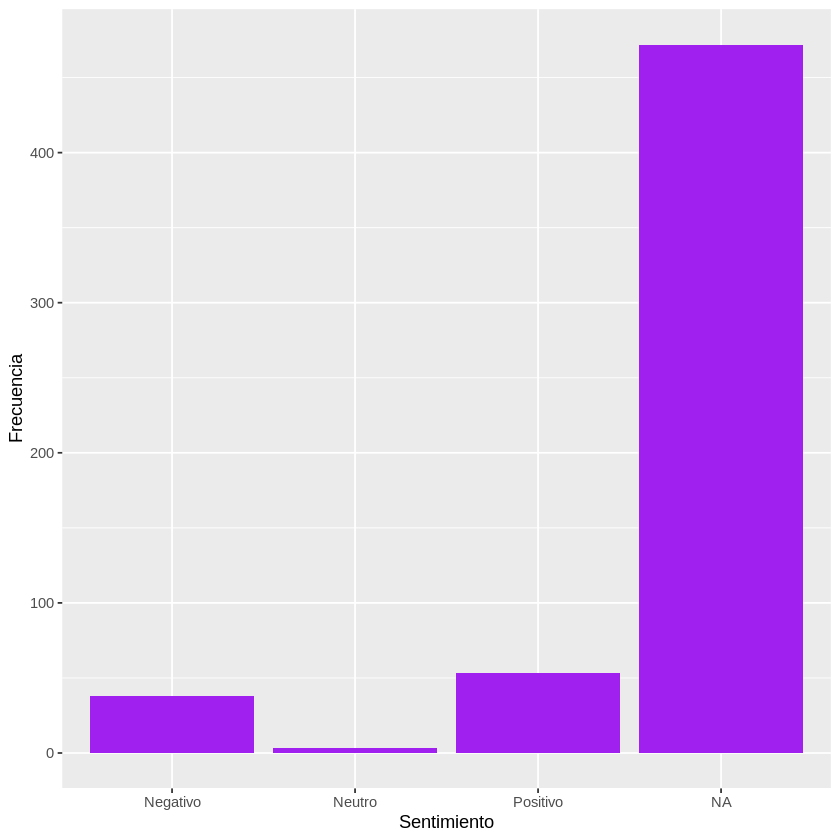

In [107]:
count_sentimiento <- data_final %>% count(sentimiento, sort = TRUE)
colnames(count_sentimiento) <- c("sentimiento", "n")

count_sentimiento %>% ggplot(aes(x = sentimiento, y = n)) + 
                      geom_bar(stat = "identity", fill = "purple") +
                      labs(x = "Sentimiento", y = "Frecuencia")

In [109]:
data_final %>% filter(sentimiento == "Negativo")

created_at,date,time,text,source,display_text_width,favorite_count,retweet_count,quote_count,reply_count,hashtags,id_tweet,texto_nuevo,sentimiento
<chr>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<chr>,<int>,<chr>,<chr>
22/09/2021 13:30,2021-09-22,13:30,#LoViEnEnlace | El Invima aprobó modificar la autorización sanitaria de uso en emergencia ASUE para la vacuna contra Covid-19 desarrollada por la farmecéutica Moderna para que pueda ser administrada en los jóvenes entre 12 y 17 años. https://t.co/IWqOA66wk5,TweetDeck,257,0,0,NA,NA,LoViEnEnlace,1,invima aprobar modificar autorización sanitario uso emergencia asue vacuna covid19 desarrollado farmecéutica moderno poder ser administrado joven 12 17 año,Negativo
21/09/2021 15:06,2021-09-21,15:06,Sigue disminuyendo el ritmo de vacunación contra el Covid-19 en Colombia: Solo 97 mil 114 dosis se aplicaron el https://t.co/sqffiJwUF0,radiosantafe,136,0,1,NA,NA,NA,9,seguir disminuir ritmo vacunación covid19 colombia solo 97 mil 114 dosis aplicar,Negativo
16/09/2021 21:03,2021-09-16,21:03,#NoticiasDeLaHora Dos jueces ordenaron al ministerio de salud aplicar en 28 días y no en 84 la segunda dosis de la vacuna contra el covid-19 de Moderna. 📻➡ https://t.co/LPPvT06WLI https://t.co/x6k6TmJkd7,TweetDeck,180,1,0,NA,NA,NoticiasDeLaHora,40,dos juez ordenar ministerio salud aplicar 28 día no 84 segundo dosis vacuna covid19 moderno,Negativo
21/09/2021 17:04,2021-09-21,17:04,"#AlAire🔴¡Bienvenidos! Hoy en #ColombiaAlAire: 🟠 Ante la #UNGA, el presidente Duque reclamó mayor equidad en la distribución de vacunas contra Covid-19. 🟠 Advierten que problemas mentales se están convirtiendo en nueva pandemia. ¡Sintonícenos!📻 https://t.co/LPPvSZPln8 https://t.co/3WRvY56mR2",Twitter Web App,272,1,1,NA,NA,AlAire ColombiaAlAire UNGA,49,hoy presidente duque reclamar mayor equidad distribución vacuno covid19 advertir problema mental convertir nuevo pandemia sintoníceno,Negativo
14/09/2021 17:16,2021-09-14,17:16,"#ColombiaAlAire Un estudio del Ministerio de Salud confirmó que la protección de las vacunas contra el Covid-19, en mayores de 60 años, es del 80 % contra efectos graves de la enfermedad. 📻👉https://t.co/LPPvT06WLI https://t.co/jBFrFZOiso",Twitter Web App,213,1,0,NA,NA,ColombiaAlAire,54,estudio ministerio salud confirmar protección vacuno covid19 mayor 60 año 80 efecto grave enfermedad,Negativo
15/09/2021 20:02,2021-09-15,20:02,#NoticiasDeLaHora Llegaron más de 10 mil vacunas contra el covid-19 a Bucaramanga. El proceso de inmunización estaba suspendido para algunas poblaciones en la ciudad. 📻➡ https://t.co/LPPvT06WLI https://t.co/E91XfFu4NY,TweetDeck,194,0,0,NA,NA,NoticiasDeLaHora,55,llegar- 10 mil vacuno covid19 bucaramanga proceso inmunización suspendido población ciudad,Negativo
20/09/2021 14:04,2021-09-20,14:04,"#NoticiasDeLaHora En crisis se encuentra el plan de vacunación contra el Covid-19 en Villavicencio, debido a la falta de envío de biológicos por parte del Ministerio de Salud. 📻👉https://t.co/LPPvT06WLI https://t.co/OTY0ljryyl",TweetDeck,204,0,0,NA,NA,NoticiasDeLaHora,58,crisis encontrar plir vacunación covid19 villavicencio deber faltar envío biológico parte ministerio salud,Negativo
14/09/2021 20:34,2021-09-14,20:34,"Se perdieron más de 900 dosis de vacunas contra el covid-19 en Jamundí, Valle del Cauca https://t.co/mDsEhJ5drY",Echobox,111,0,0,NA,NA,NA,80,perder 900 dosis vacuno covid19 jamunder valle cauca,Negativo
22/09/2021 9:29,2021-09-22,9:29,Covid-19: La vacunación pierde ritmo en Colombia | Sociedad | EL PAÍS https://t.co/vCwla0YEGO,Twitter Web App,93,0,0,NA,NA,NA,87,covid19 vacunación pierde ritmo colombia sociedad país,Negativo
